In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [67]:
df = pd.read_csv('data_science_job.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [68]:
le = LabelEncoder()
df['city'] = le.fit_transform(df['city'])
df['gender'] = le.fit_transform(df['gender'])
df['relevent_experience'] = le.fit_transform(df['relevent_experience'])
df['enrolled_university'] = le.fit_transform(df['enrolled_university'])
df['education_level'] = le.fit_transform(df['education_level'])
df['major_discipline'] = le.fit_transform(df['major_discipline'])
df['company_size'] = le.fit_transform(df['company_size'])
df['company_type'] = le.fit_transform(df['company_type'])
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,5,0.920,1,0,2,0,5,20.0,8,6,36.0,1.0
1,29725,77,0.776,1,1,2,0,5,15.0,4,5,47.0,0.0
2,11561,64,0.624,3,1,0,0,5,5.0,8,6,83.0,0.0
3,33241,14,0.789,3,1,3,0,1,0.0,8,5,52.0,1.0
4,666,50,0.767,1,0,2,2,5,20.0,4,1,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,55,0.878,1,1,2,0,2,14.0,8,6,42.0,1.0
19154,31398,5,0.920,1,0,2,0,5,14.0,8,6,52.0,1.0
19155,24576,5,0.920,1,0,2,0,5,20.0,4,5,44.0,0.0
19156,5756,94,0.802,1,0,2,1,6,0.0,5,5,97.0,0.0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  int64  
 2   city_development_index  18679 non-null  float64
 3   gender                  19158 non-null  int64  
 4   relevent_experience     19158 non-null  int64  
 5   enrolled_university     19158 non-null  int64  
 6   education_level         19158 non-null  int64  
 7   major_discipline        19158 non-null  int64  
 8   experience              19093 non-null  float64
 9   company_size            19158 non-null  int64  
 10  company_type            19158 non-null  int64  
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(9)
memory usage: 1.9 MB


In [70]:
df.isnull().mean() * 100

enrollee_id               0.000000
city                      0.000000
city_development_index    2.500261
gender                    0.000000
relevent_experience       0.000000
enrolled_university       0.000000
education_level           0.000000
major_discipline          0.000000
experience                0.339284
company_size              0.000000
company_type              0.000000
training_hours            3.998330
target                    0.000000
dtype: float64

In [71]:
print('Original City development index variable variance: ', df['city_development_index'].var())
print('City development index Variance after mean imputation: ', df['city_development_index'].fillna(df['city_development_index'].mean()).var())
print()
print('Original Experience variable variance: ', df['experience'].var())
print('Experience Variance after mean imputation: ', df['experience'].fillna(df['experience'].mean()).var())
print()
print('Original Training hours variable variance: ', df['training_hours'].var())
print('Training hours Variance after mean imputation: ', df['training_hours'].fillna(df['training_hours'].mean()).var())

Original City development index variable variance:  0.015211374664424446
City development index Variance after mean imputation:  0.014831030745008628

Original Experience variable variance:  42.31851676548554
Experience Variance after mean imputation:  42.17492937759826

Original Training hours variable variance:  3586.2881933989347
Training hours Variance after mean imputation:  3442.889083092338


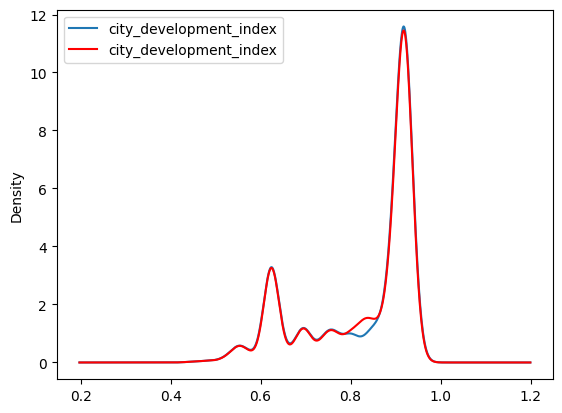

In [72]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['city_development_index'].plot(kind='kde', ax=ax)
df['city_development_index'].fillna(df['city_development_index'].mean()).plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

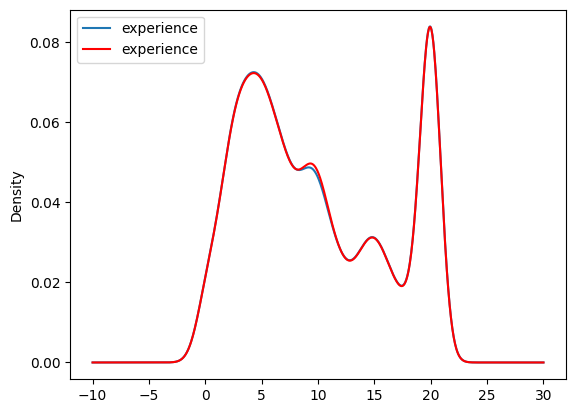

In [73]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['experience'].plot(kind='kde', ax=ax)
df['experience'].fillna(df['experience'].mean()).plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

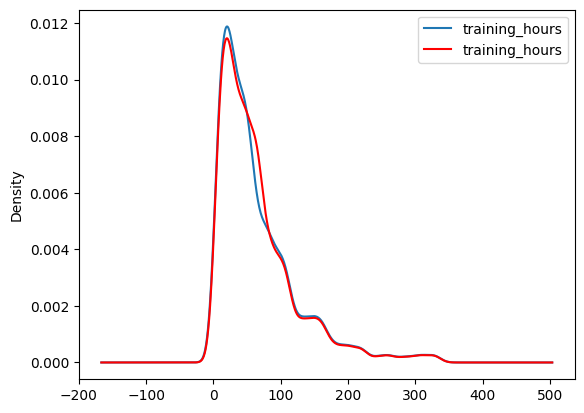

In [74]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['training_hours'].plot(kind='kde', ax=ax)
df['training_hours'].fillna(df['training_hours'].mean()).plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [75]:
df.cov()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
enrollee_id,9.247308e+07,-3944.292094,-46.899255,-448.503958,187.235946,-228.871055,-271.166385,-180.565583,-2262.377087,573.211946,366.924801,1302.791587,205.837604
city,-3.944292e+03,1257.695913,-1.424263,1.613128,0.098004,-1.987914,0.271745,3.929061,-27.134817,2.738530,1.030206,18.198218,0.862801
city_development_index,-4.689925e+01,-1.424263,0.015211,-0.017453,-0.003413,0.015313,0.005682,-0.013201,0.266895,-0.019334,-0.005313,-0.015343,-0.018154
gender,-4.485040e+02,1.613128,-0.017453,0.842835,0.040870,-0.061424,0.064581,0.063789,-0.834942,0.161618,0.060797,0.076447,0.026880
relevent_experience,1.872359e+02,0.098004,-0.003413,0.040870,0.201651,-0.129663,0.059348,0.045339,-1.008032,0.442083,0.126181,-0.266162,0.024952
enrolled_university,-2.288711e+02,-1.987914,0.015313,-0.061424,-0.129663,0.678266,0.085081,-0.110943,1.703615,-0.441434,-0.101190,0.135749,-0.050370
education_level,-2.711664e+02,0.271745,0.005682,0.064581,0.059348,0.085081,1.412199,0.238214,0.302922,0.286073,0.065336,-0.583170,-0.038948
major_discipline,-1.805656e+02,3.929061,-0.013201,0.063789,0.045339,-0.110943,0.238214,1.112532,-0.636746,0.222974,0.093035,0.428450,-0.002516
experience,-2.262377e+03,-27.134817,0.266895,-0.834942,-1.008032,1.703615,0.302922,-0.636746,42.318517,-2.381465,-0.342112,-0.317638,-0.501408
company_size,5.732119e+02,2.738530,-0.019334,0.161618,0.442083,-0.441434,0.286073,0.222974,-2.381465,8.201862,1.460287,-0.215737,0.230605


In [76]:
df.corr()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
enrollee_id,1.000000,-0.011566,-0.039557,-0.050803,0.043359,-0.028899,-0.023729,-0.017802,-0.036147,0.020814,0.025567,0.002263,0.049475
city,-0.011566,1.000000,-0.325651,0.049546,0.006154,-0.068063,0.006448,0.105038,-0.117605,0.026963,0.019465,0.008573,0.056233
city_development_index,-0.039557,-0.325651,1.000000,-0.154172,-0.061629,0.150673,0.038715,-0.101459,0.333050,-0.054754,-0.028823,-0.002083,-0.340239
gender,-0.050803,0.049546,-0.154172,1.000000,0.099137,-0.081239,0.059195,0.065875,-0.140125,0.061470,0.044373,0.001390,0.067676
relevent_experience,0.043359,0.006154,-0.061629,0.099137,1.000000,-0.350603,0.111214,0.095723,-0.345127,0.343754,0.188282,-0.009898,0.128430
enrolled_university,-0.028899,-0.068063,0.150673,-0.081239,-0.350603,1.000000,0.086933,-0.127716,0.318266,-0.187159,-0.082329,0.002751,-0.141363
education_level,-0.023729,0.006448,0.038715,0.059195,0.111214,0.086933,1.000000,0.190048,0.039295,0.084057,0.036840,-0.008211,-0.075754
major_discipline,-0.017802,0.105038,-0.101459,0.065875,0.095723,-0.127716,0.190048,1.000000,-0.092800,0.073814,0.059102,0.006774,-0.005513
experience,-0.036147,-0.117605,0.333050,-0.140125,-0.345127,0.318266,0.039295,-0.092800,1.000000,-0.127839,-0.035238,-0.000815,-0.178238
company_size,0.020814,0.026963,-0.054754,0.061470,0.343754,-0.187159,0.084057,0.073814,-0.127839,1.000000,0.341661,-0.001258,0.186114


In [77]:
df['city_development_index'] = df['city_development_index'].fillna(df['city_development_index'].mean())
df['experience'] = df['experience'].fillna(df['experience'].mean())
df['training_hours'] = df['training_hours'].fillna(df['training_hours'].mean())

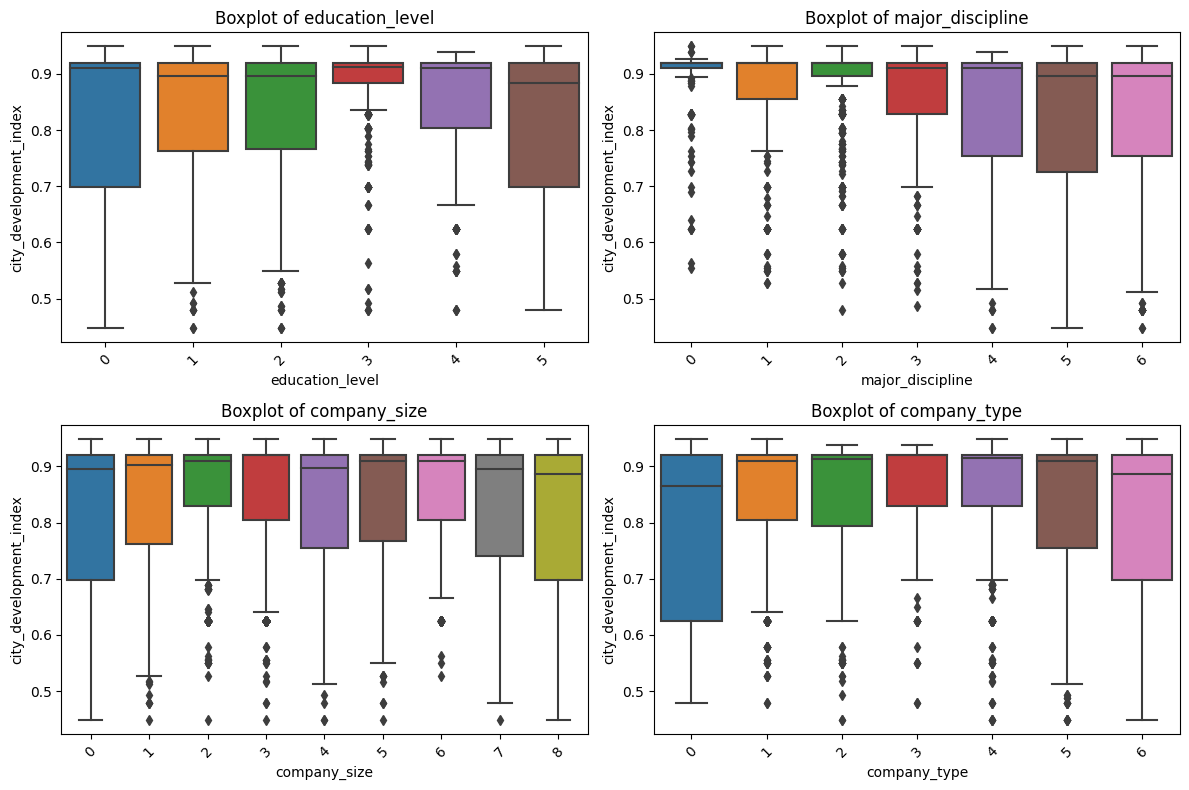

In [78]:
plt.figure(figsize=(12, 8))

categorical_vars = ['education_level', 'major_discipline', 'company_size', 'company_type']
for col in categorical_vars:
    plt.subplot(2, 2, categorical_vars.index(col) + 1)
    sns.boxplot(x=col, y='city_development_index', data=df)
    plt.title(f'Boxplot of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

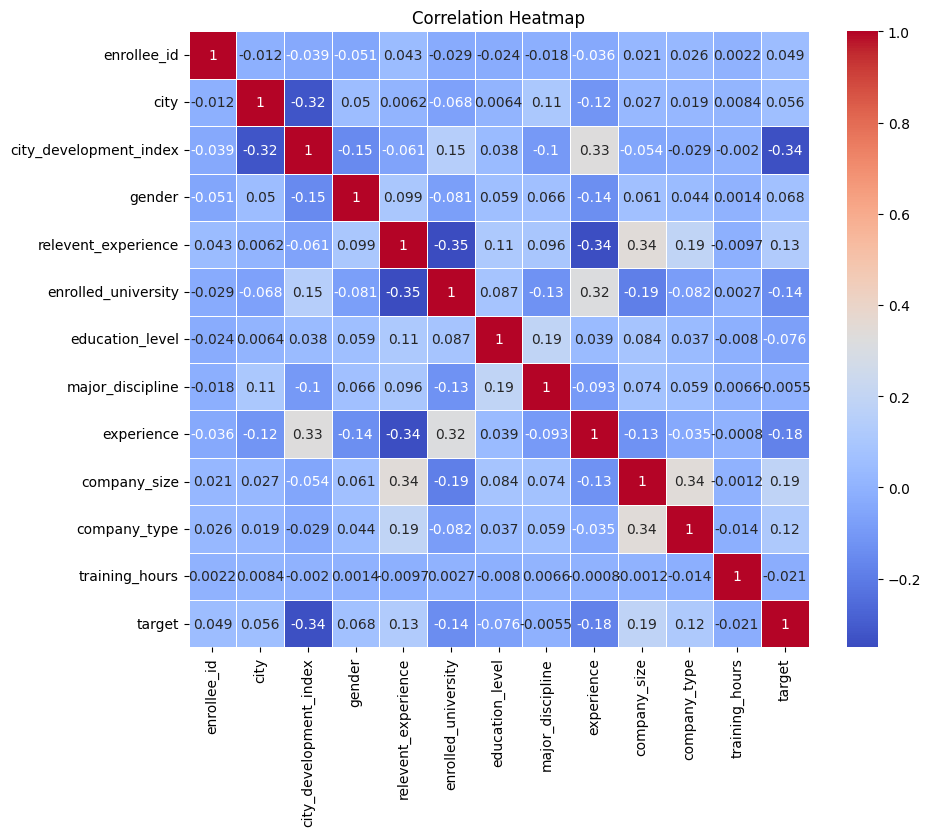

In [79]:
# correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

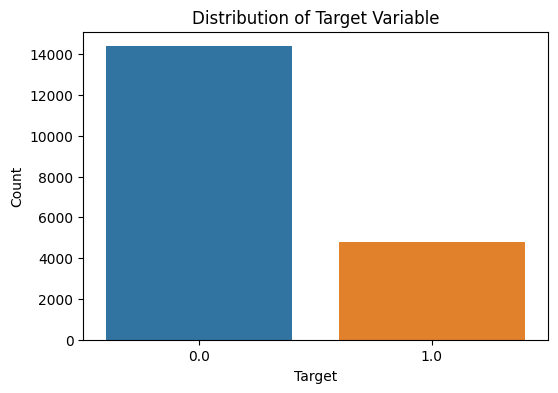

In [80]:
# distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [82]:
X = df.drop(columns=['target'])
y = df['target']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train.shape, X_test.shape

((15326, 12), (3832, 12))

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
MAE: 0.2477
RMSE: 0.4976
----------------------------------------
Model: Decision Tree
MAE: 0.2797
RMSE: 0.5289
----------------------------------------
Model: Random Forest
MAE: 0.2127
RMSE: 0.4612
----------------------------------------
Model: Gradient Boosting
MAE: 0.1983
RMSE: 0.4453
----------------------------------------


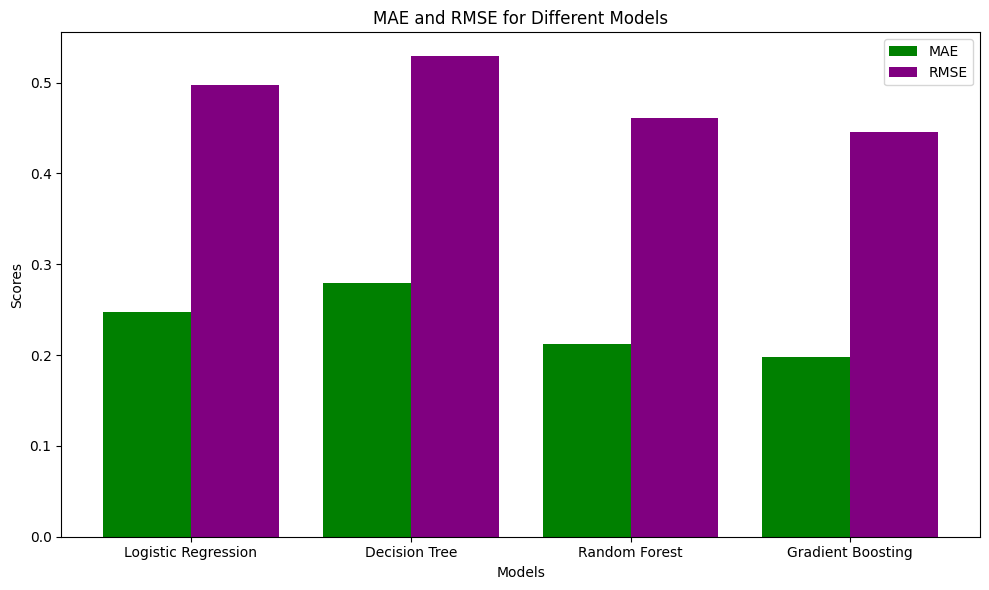

In [84]:
# Initialize models

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Lists to store evaluation metrics

mae_scores = []
rmse_scores = []

# Training and evaluating models

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    mae_scores.append(mae)
    rmse_scores.append(rmse)

    print(f'Model: {name}')
    print(f'MAE: {mae:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print('-' * 40)

# Create grouped bar plot for evaluation metrics

x = np.arange(len(models))
bar_width = 0.4

plt.figure(figsize=(10, 6))

plt.bar(x, mae_scores, width=bar_width, label='MAE', color='green')
plt.bar(x + bar_width, rmse_scores, width=bar_width, label='RMSE', color='purple')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('MAE and RMSE for Different Models')
plt.xticks(x + bar_width / 2, models.keys())
plt.legend()

plt.tight_layout()
plt.show()